# Explore here

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pickle

In [65]:
urlds = 'https://breathecode.herokuapp.com/asset/internal-link?id=733&path=demographic_health_data.csv'
urlresume = 'https://breathecode.herokuapp.com/asset/internal-link?id=733&path=data_dict.csv'
pd.read_csv(urlds, encoding= 'utf-8').to_csv('../data/raw/demographic_health_data.csv')
pd.read_csv(urlresume).to_csv('../data/raw/data_dict.csv')

In [66]:
df = pd.read_csv('../data/raw/demographic_health_data.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [67]:
data = pd.read_csv('../data/raw/data_dict.csv')
data

,Unnamed: 0,Feature,Unnamed: 1,Unnamed: 2
0,0,fips,FIPS Code for the County,NaN
1,1,TOT_POP,Total Population,This data as well as all Age and Race data is ...
2,2,0-9,Population aged 0-9,All of the other age columns are the same but ...
3,3,0-9 y/o % of total pop,% of the population aged 0-9,NaN
4,4,10-19',NaN,NaN
...,...,...,...,...
112,112,NaN,"7 (Urban population of 2,500 to 19,999, not ad...",NaN
113,113,NaN,"8 (Completely rural or less than 2,500 urban p...",NaN
114,114,NaN,"9 (Completely rural or less than 2,500 urban p...",NaN
115,115,NaN,88 (Unknown-Alaska/Hawaii State/not official U...,NaN


In [68]:
df.shape

(3140, 108)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [70]:
df.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)

In [71]:
#let's delete % colums as they are duplicated info

df = df.drop([
    '0-9 y/o % of total pop',
    '10-19 y/o % of total pop',
    '20-29 y/o % of total pop',
    '30-39 y/o % of total pop',
    '40-49 y/o % of total pop',
    '50-59 y/o % of total pop',
    '60-69 y/o % of total pop',
    '70-79 y/o % of total pop',
    '80+ y/o % of total pop',
    '% White-alone',
    '% Black-alone',
    '% NA/AI-alone',
    '% Asian-alone',
    '% Hawaiian/PI-alone',
    '% Two or more races',
    'Percent of adults with less than a high school diploma 2014-18',
    'Percent of adults with a high school diploma only 2014-18',
    "Percent of adults completing some college or associate's degree 2014-18",
    "Percent of adults with a bachelor's degree or higher 2014-18",
    'Percent of Population Aged 60+',
], axis= 1)

df.head()

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,7637,6878,7089,7582,7738,5826,4050,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,26913,23579,25213,27338,29986,29932,20936,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,2960,3268,3201,3074,3278,3076,2244,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,2596,3029,3113,3038,3115,2545,1723,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,7570,6742,6884,7474,7844,6965,4931,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 88 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   fips                                                                           3140 non-null   int64  
 1   TOT_POP                                                                        3140 non-null   int64  
 2   0-9                                                                            3140 non-null   int64  
 3   19-Oct                                                                         3140 non-null   int64  
 4   20-29                                                                          3140 non-null   int64  
 5   30-39                                                                          3140 non-null   int64  
 6   40-49                   

In [73]:
df.select_dtypes(include='object').columns


Index(['COUNTY_NAME', 'STATE_NAME'], dtype='object')

In [74]:
county = df['COUNTY_NAME'].unique()
states = df['STATE_NAME'].unique()
county, states

(array(['Autauga', 'Baldwin', 'Barbour', ..., 'Uinta', 'Washakie',
        'Weston'], shape=(1841,), dtype=object),
 array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
        'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
        'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
        'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
        'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
        'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
        'New Jersey', 'New Mexico', 'New York', 'North Carolina',
        'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
        'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
        'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
        'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object))

In [75]:
df.describe()

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,1.336798e+04,1.446933e+04,1.391649e+04,1.288521e+04,1.363803e+04,1.191621e+04,7220.310510,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,4.228439e+04,4.957773e+04,4.899095e+04,4.347219e+04,4.272063e+04,3.451858e+04,20287.498429,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,4.000000e+00,1.400000e+01,2.000000e+01,6.000000,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,1.374500e+03,1.263750e+03,1.232750e+03,1.245250e+03,1.483000e+03,1.476500e+03,950.750000,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,3.274000e+03,3.108000e+03,3.000500e+03,3.048500e+03,3.515500e+03,3.410000e+03,2177.000000,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,8.822250e+03,8.976250e+03,8.314250e+03,8.120500e+03,9.157250e+03,8.710500e+03,5574.000000,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,1.239139e+06,1.557073e+06,1.501844e+06,1.350076e+06,1.306003e+06,1.014325e+06,572530.000000,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [76]:
df.isna().sum().sort_values(ascending=True).head(20)

fips                                         0
TOT_POP                                      0
0-9                                          0
19-Oct                                       0
20-29                                        0
30-39                                        0
40-49                                        0
50-59                                        0
60-69                                        0
70-79                                        0
80+                                          0
White-alone pop                              0
Black-alone pop                              0
Native American/American Indian-alone pop    0
Asian-alone pop                              0
Hawaiian/Pacific Islander-alone pop          0
Two or more races pop                        0
POP_ESTIMATE_2018                            0
N_POP_CHG_2018                               0
GQ_ESTIMATES_2018                            0
dtype: int64

In [77]:
df[['COUNTY_NAME', 'STATE_NAME', 'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)']]

,COUNTY_NAME,STATE_NAME,Total Hospitals (2019),Internal Medicine Primary Care (2019)
0,Autauga,Alabama,1.148905,25.992561
1,Baldwin,Alabama,4.505074,101.921730
2,Barbour,Alabama,0.514126,11.631462
3,Bibb,Alabama,0.462860,10.471635
4,Blount,Alabama,1.195171,27.039257
...,...,...,...,...
3135,Sweetwater,Wyoming,2.160982,9.836192
3136,Teton,Wyoming,1.158570,5.273493
3137,Uinta,Wyoming,1.018926,4.637868
3138,Washakie,Wyoming,0.395794,1.801546


In [78]:
df.duplicated().sum()

np.int64(0)

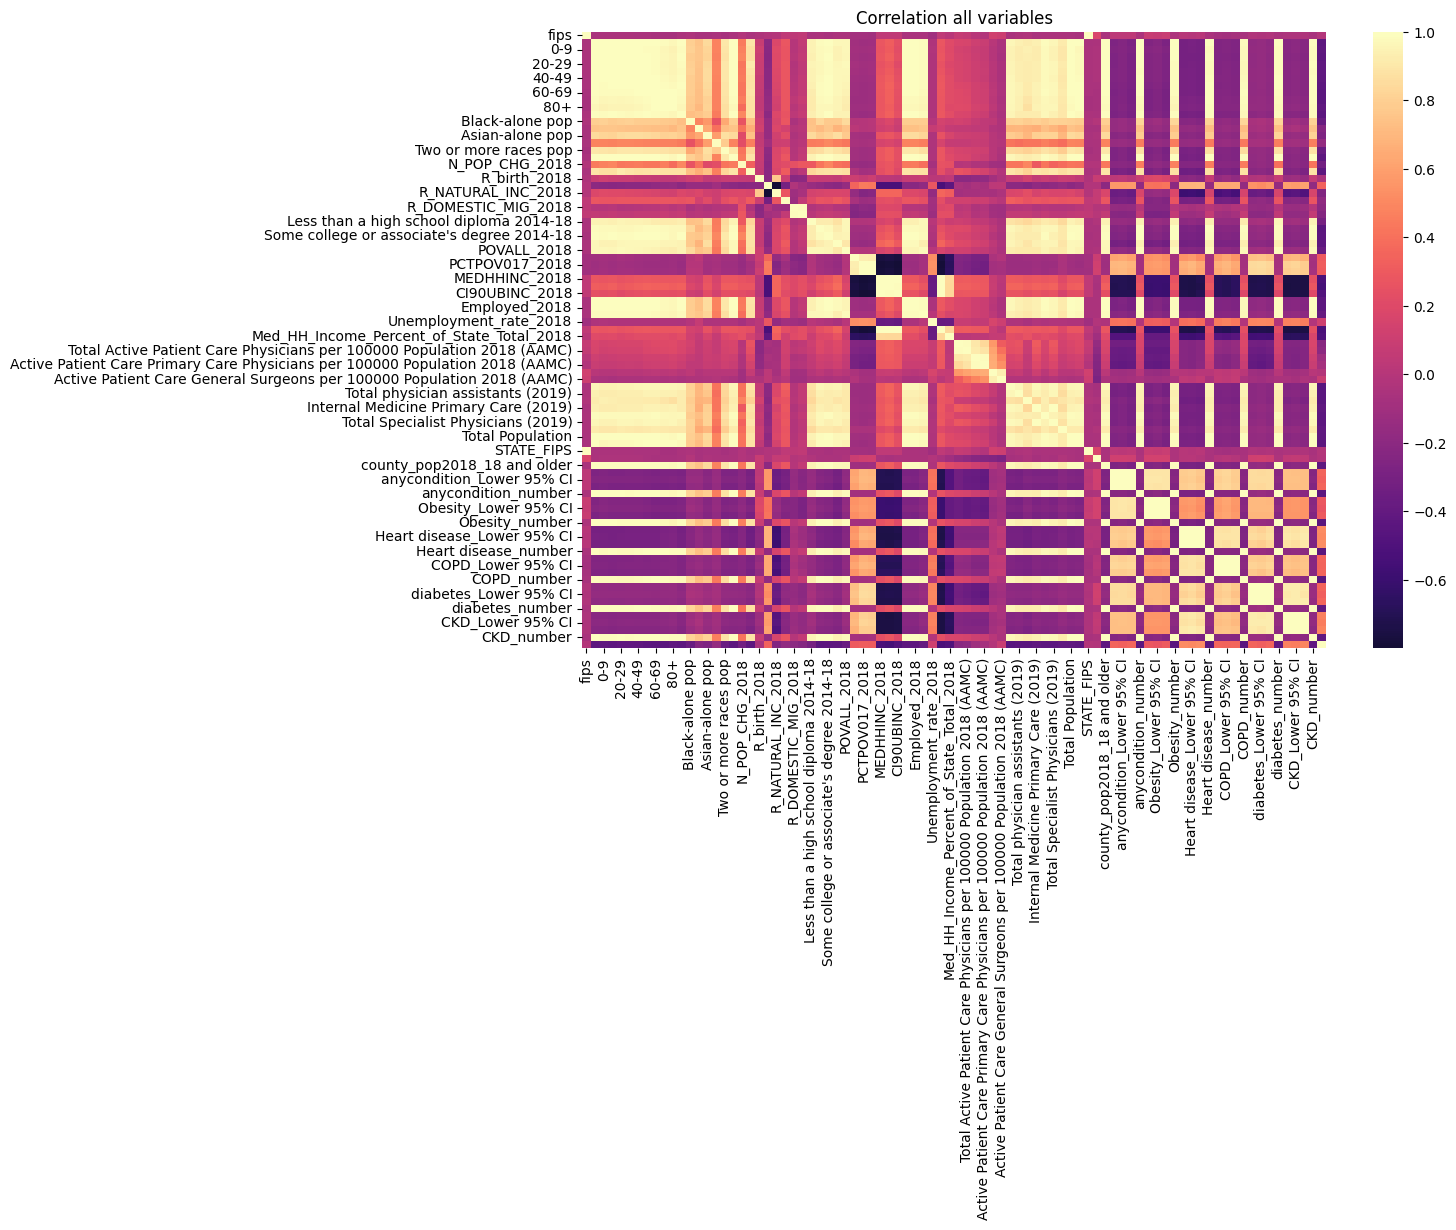

In [79]:
plt.figure(figsize=(12, 8))

corr = df.corr(numeric_only=True)

sns.heatmap(corr, cmap='magma', center=0)

plt.title('Correlation all variables')
plt.show()


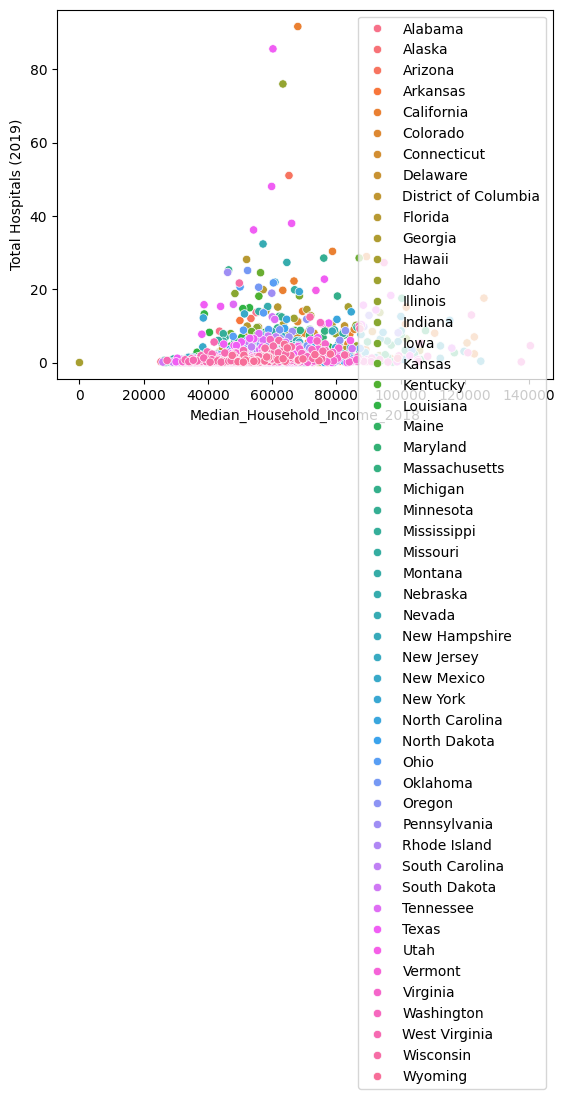

In [80]:
plt.Figure(figsize=(8, 5))
sns.scatterplot(
    x= 'Median_Household_Income_2018',
    y= 'Total Hospitals (2019)',
    hue ='STATE_NAME',
    data=df
)

plt.legend ()
plt.show()


In [81]:
encoders = {}
for col in df.select_dtypes(include='object').columns:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders[col] = encoder


df.head()

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,7637,6878,7089,7582,7738,5826,4050,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,26913,23579,25213,27338,29986,29932,20936,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,2960,3268,3201,3074,3278,3076,2244,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,2596,3029,3113,3038,3115,2545,1723,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,7570,6742,6884,7474,7844,6965,4931,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [82]:
X = df.drop(['Internal Medicine Primary Care (2019)'], axis=1)
y = df['Internal Medicine Primary Care (2019)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [83]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [84]:
#looking for kbest
selection_model = SelectKBest(f_classif, k = 13)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train = selection_model.transform(X_train)
X_test = selection_model.transform(X_test)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [85]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [86]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(107.97014633893367, 0.993310162179469)

In [87]:
y_test = y_test.reset_index(drop=True)

pred = pd.DataFrame({'y_pred':y_pred})
pred['y_test'] = y_test
pred['error'] = pred['y_pred'] - pred['y_test']
pred

,y_pred,y_test,error
0,3.202672,4.507495,-1.304823
1,143.336028,134.193740,9.142288
2,6.479367,7.694205,-1.214837
3,90.160835,87.033524,3.127311
4,120.191204,112.249640,7.941564
...,...,...,...
623,17.627192,16.326018,1.301174
624,7.659937,4.347884,3.312053
625,32.229844,33.191378,-0.961533
626,55.810607,51.714715,4.095892


In [88]:
#save the model

with open('../models/linear_regression_model.pkl', 'wb') as archive:
    pickle.dump(model, archive)